import data and libraries

In [2]:
import pandas as pd
from helpers.data_loader import DataLoader
from helpers.data_preprocessing import DataProcesser

def load_comments():
    code = DataLoader.load_csv_file("./../../data/code_data.csv", ['code'])

    def load_longer_code():
        f = open("./../../data/code_javadoc.txt", "r")
        Lines = f.readlines()
        code_long = []
        for line in Lines:
            line = line.rstrip()
            # print(line)
            code_long.append(line)
        f.close()
        return code_long

    code_long = load_longer_code()
    for index, row in code.iterrows():
        curr_code_long = code_long[index]
        if curr_code_long != '':
            row['code'] = curr_code_long
    return code
code = load_comments()
code.head()

,code
0,"""public static void showContextMenu(TextArea t..."
1,"TABLE_ICONS.put(SpecialField.PRINTED, icon);"
2,BindingsHelper.bindBidirectional(valueProperty...
3,"""private boolean confirmClose(BasePanel panel)..."
4,"INTEGRITY_INFO(MaterialDesignIcon.INFORMATION),"


Preprocess code:
1. Separate words from camel case and snake case,
2. To lower case,
3. Remove java tags,
4. remove accented chars,
5. stem

In [3]:
code['code'] = code['code'].apply(str)
code['code'] = code['code'].apply(DataProcesser.extract_camel_case)
code['code'] = code['code'].apply(DataProcesser.extract_snake_case)
code['code'] = code['code'].apply(DataProcesser.preprocess)
code.head()

,code
0,show context menu text area text area context ...
1,tabl icon put special field pred icon
2,bind helper bind bidirect valu properti tempor...
3,confirm close base panel panel filenam panel g...
4,egriti info materi design icon inmat


Get most frequent comment words

In [4]:
from helpers.textual_analysis import *

code_common_words = get_most_common_words(code['code'])
code_common_words.most_common(15)

[('get', 3049),
 ('file', 1449),
 ('set', 1341),
 ('en', 1289),
 ('text', 1040),
 ('field', 993),
 ('type', 983),
 ('list', 867),
 ('dialog', 830),
 ('name', 786),
 ('databas', 723),
 ('prefer', 682),
 ('key', 627),
 ('group', 605),
 ('bib', 601)]

Word cloud

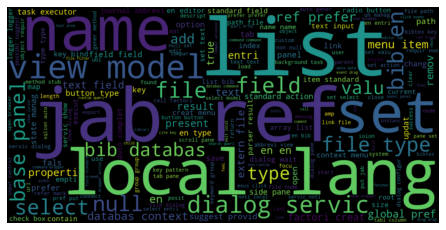

In [5]:
create_word_cloud(code['code'])

Remove Java keywords

In [6]:
code = load_comments()
code['code'] = code['code'].apply(str)
code['code'] = code['code'].apply(DataProcesser.extract_camel_case)
code['code'] = code['code'].apply(DataProcesser.extract_snake_case)
code['code'] = code['code'].apply(DataProcesser.remove_java_keywords)
code['code'] = code['code'].apply(DataProcesser.remove_stopwords)
code['code'] = code['code'].apply(DataProcesser.preprocess)

code['code'].head()

0    show context menu text area text area context ...
1                tabl icon put special field pred icon
2    bind helper bind bidirect valu properti tempor...
3    confirm close base panel panel filenam panel g...
4                 egriti info materi design icon inmat
Name: code, dtype: object

Get most frequent comment words after removing java keywords

In [7]:
from helpers.textual_analysis import *

code_most_common_words = get_most_common_words(code['code'])
code_most_common_words.most_common(15)

[('get', 3138),
 ('file', 1526),
 ('set', 1385),
 ('en', 1294),
 ('text', 1115),
 ('type', 1024),
 ('field', 997),
 ('list', 962),
 ('dialog', 931),
 ('name', 790),
 ('databas', 723),
 ('prefer', 685),
 ('button', 649),
 ('key', 632),
 ('bib', 613)]

Word cloud

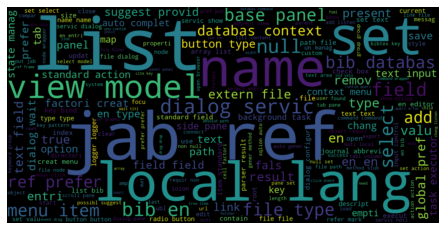

In [8]:
create_word_cloud(code['code'])


Add comments to the dataframe

In [9]:
data = pd.read_csv("./../../data/train_set_0520.csv", usecols=['comment', 'non-information'])
data['code'] = code['code']
data.head()

,comment,non-information,code
0,@implNote taken from {@link com.sun.javafx.sce...,yes,show context menu text area text area context ...
1,icon.setToolTipText(printedViewModel.getLocali...,yes,tabl icon put special field pred icon
2,Synchronize changes of the underlying date val...,no,bind helper bind bidirect valu properti tempor...
3,Ask if the user really wants to close the give...,yes,confirm close base panel panel filenam panel g...
4,css: information *,no,egriti info materi design icon inmat


Number of empty code

In [63]:
empty_comments = data[data['code'] == ""].count()
empty_comments


comment            12
non-information    10
code               12
dtype: int64

Non-information: yes - most frequent code words

In [10]:
bad_code = data[data['non-information'] == "yes"]
bad_code['code'] = bad_code['code'].apply(str)
code = get_most_common_words(bad_code['code'])
code.most_common(15)


<ipython-input-10-c37951c60527>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_code['code'] = bad_code['code'].apply(str)


[('get', 405),
 ('file', 285),
 ('type', 182),
 ('set', 174),
 ('en', 161),
 ('button', 137),
 ('prefer', 134),
 ('dialog', 133),
 ('field', 128),
 ('list', 107),
 ('name', 102),
 ('select', 95),
 ('databas', 90),
 ('tabl', 88),
 ('view', 88)]

Non-information: no - most frequent code words

In [11]:
bad_code = data[data['non-information'] == "no"]
bad_code['code'] = bad_code['code'].apply(str)
code = get_most_common_words(bad_code['code'])
code.most_common(15)

<ipython-input-11-3f92eaf604b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_code['code'] = bad_code['code'].apply(str)


[('get', 2731),
 ('file', 1239),
 ('set', 1210),
 ('en', 1133),
 ('text', 1050),
 ('field', 869),
 ('list', 855),
 ('type', 842),
 ('dialog', 797),
 ('name', 688),
 ('databas', 632),
 ('key', 584),
 ('group', 559),
 ('prefer', 551),
 ('valu', 541)]